# **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
from datetime import datetime
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')
sns.set_theme(style="dark")

# **Importing Dataset**

In [3]:
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# **Data Preprocessing**

In [5]:
print("No of Missing Values : ")
missing_values_count = data.isnull().sum()
missing_values_count
data = data.dropna()
print("Missing Values after Dropping :")
missing_values_count = data.isnull().sum()
missing_values_count

No of Missing Values : 
Missing Values after Dropping :


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [6]:
print("Duplicated Values Before Dropping: ",data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicated Values After Dropping: ",data.duplicated().sum())

Duplicated Values Before Dropping:  24
Duplicated Values After Dropping:  0


In [7]:
data = data.drop(columns=['Loud Cover'])

In [8]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce')
data["Time"] = [d.time() for d in data['Formatted Date']]
data["Time"] = data["Time"].astype(str)
data["Time"] = data["Time"].str.split(':').str[0].astype(int)
data["Date"] = [d.date() for d in data['Formatted Date']]
data["Date"]= data["Date"].astype(str)
data["Year"] = data["Date"].str.split('-').str[0].astype(int)
data["Month"] = data["Date"].str.split('-').str[1].astype(int)
data["Day"] = data["Date"].str.split('-').str[2].astype(int)
data = data.drop(columns=['Formatted Date','Date'], axis=1)

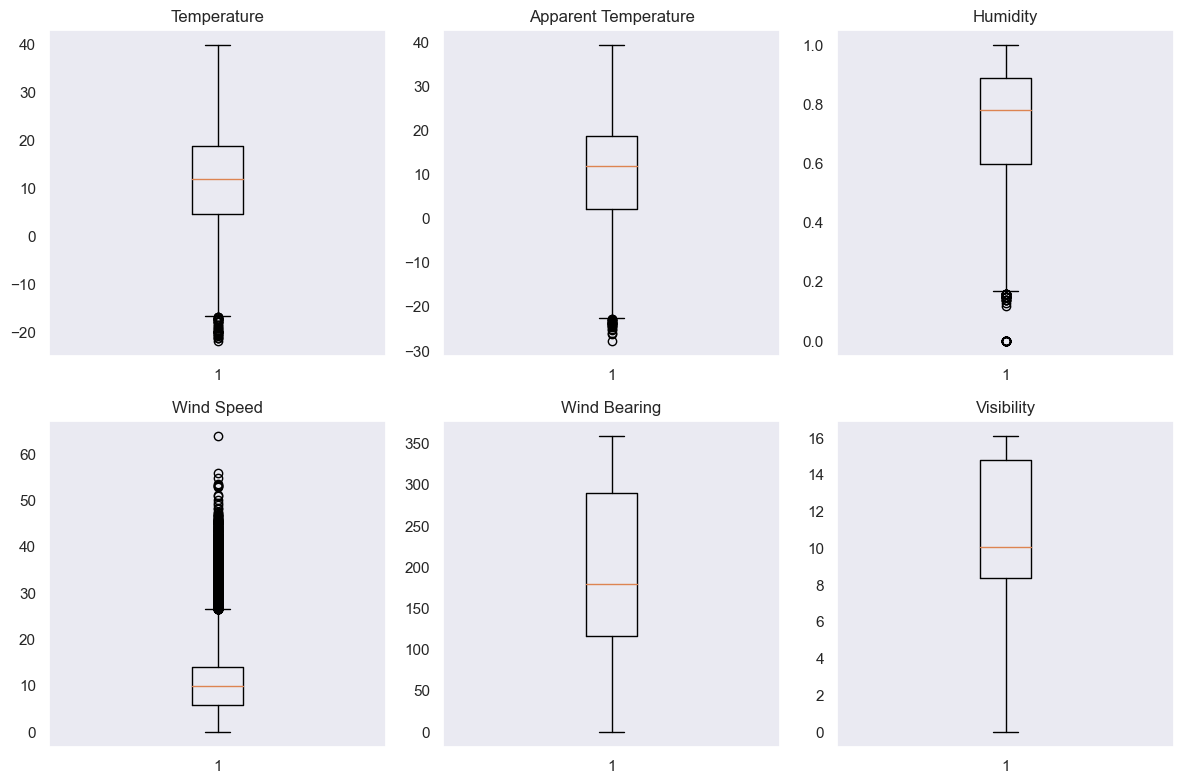

In [9]:
plt.figure(figsize=(12, 8))

# Temperature
plt.subplot(2, 3, 1)
plt.boxplot(data['Temperature (C)'])
plt.title('Temperature')

# Apparent Temperature
plt.subplot(2, 3, 2)
plt.boxplot(data['Apparent Temperature (C)'])
plt.title('Apparent Temperature')

# Humidity
plt.subplot(2, 3, 3)
plt.boxplot(data['Humidity'])
plt.title('Humidity')

# Wind Speed
plt.subplot(2, 3, 4)
plt.boxplot(data['Wind Speed (km/h)'])
plt.title('Wind Speed')

# Wind Bearing
plt.subplot(2, 3, 5)
plt.boxplot(data['Wind Bearing (degrees)'])
plt.title('Wind Bearing')

# Visibility
plt.subplot(2, 3, 6)
plt.boxplot(data['Visibility (km)'])
plt.title('Visibility')

plt.tight_layout()
plt.show()

In [10]:
def identify_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_series < lower_bound) | (data_series > upper_bound)
    return outliers

outlier_counts = {
    'Temperature': identify_outliers(data['Temperature (C)']).sum(),
    'Apparent Temperature': identify_outliers(data['Apparent Temperature (C)']).sum(),
    'Humidity': identify_outliers(data['Humidity']).sum(),
    'Wind Speed': identify_outliers(data['Wind Speed (km/h)']).sum(),
    'Wind Bearing': identify_outliers(data['Wind Bearing (degrees)']).sum(),
    'Visibility': identify_outliers(data['Visibility (km)']).sum()
}

print("Number of outliers for each variable:")
for variable, count in outlier_counts.items():
    print(f"{variable}: {count}")

Number of outliers for each variable:
Temperature: 39
Apparent Temperature: 22
Humidity: 46
Wind Speed: 3011
Wind Bearing: 0
Visibility: 0


In [11]:
outliers_mask = (identify_outliers(data['Temperature (C)']) |
                 identify_outliers(data['Apparent Temperature (C)']) |
                 identify_outliers(data['Humidity']) |
                 identify_outliers(data['Wind Speed (km/h)']) |
                 identify_outliers(data['Wind Bearing (degrees)']) |
                 identify_outliers(data['Visibility (km)']))

data_filtered = data[~outliers_mask]

data_filtered.reset_index(drop=True, inplace=True)

print("Shape of the filtered DataFrame:", data_filtered.shape)

data = data_filtered

Shape of the filtered DataFrame: (92817, 14)


In [12]:
numeric_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
categorical_columns = list(data.select_dtypes(include=['object']).columns)
continuous_columns = [i for i in numeric_columns if len(list(data[i].unique()))>=25]
discrete_columns = [i for i in numeric_columns if len(list(data[i].unique()))<25]
print("Numerical Columns: ", numeric_columns)
print()
print("Categorical Columns: ", categorical_columns)
print()
print("Continuous Columns: ", continuous_columns)
print()
print("Discrete Columns: ", discrete_columns)

Numerical Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

Categorical Columns:  ['Summary', 'Precip Type', 'Daily Summary']

Continuous Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

Discrete Columns:  []


In [13]:
counts = data["Summary"].value_counts()
total = counts.sum()
percentages = (counts / total) * 100
print(percentages)

Partly Cloudy              33.680253
Mostly Cloudy              29.543079
Overcast                   17.355657
Clear                      11.502203
Foggy                       7.600978
Dry and Partly Cloudy       0.082959
Light Rain                  0.066798
Humid and Mostly Cloudy     0.042018
Drizzle                     0.042018
Dry                         0.032322
Humid and Partly Cloudy     0.018316
Dry and Mostly Cloudy       0.015083
Rain                        0.010774
Humid and Overcast          0.007542
Name: Summary, dtype: float64


In [14]:
data = data[(data["Summary"] == "Overcast") | (data["Summary"] == "Clear") | (data["Summary"] == "Foggy")]

In [15]:
counts = data["Summary"].value_counts()
total = counts.sum()
percentages = (counts / total) * 100
print(percentages)

Overcast    47.603428
Clear       31.548463
Foggy       20.848109
Name: Summary, dtype: float64


In [16]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Time,Year,Month,Day
count,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000,33840.000000
mean,7.688063,6.270560,0.828765,9.548173,178.808422,8.359797,989.382503,10.464864,2010.793587,6.482388,15.803014
std,8.720129,9.836133,0.158206,5.915114,109.578947,5.002029,168.386813,7.407098,3.136649,3.958477,8.774728
min,-16.705556,-22.416667,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,1.000000,1.000000
25%,1.122222,-1.250000,0.770000,4.733400,91.000000,3.960600,1011.650000,4.000000,2008.000000,3.000000,8.000000
50%,7.033333,5.102778,0.880000,9.096500,170.000000,9.676100,1017.210000,9.000000,2011.000000,7.000000,16.000000
75%,13.723611,13.723611,0.930000,13.298600,281.000000,11.270000,1023.512500,17.000000,2014.000000,10.000000,23.000000
max,37.938889,38.661111,1.000000,26.613300,359.000000,16.100000,1046.380000,23.000000,2016.000000,12.000000,31.000000


# **EDA**

In [17]:
yearly_avg = data.groupby('Year').mean(numeric_only=True)

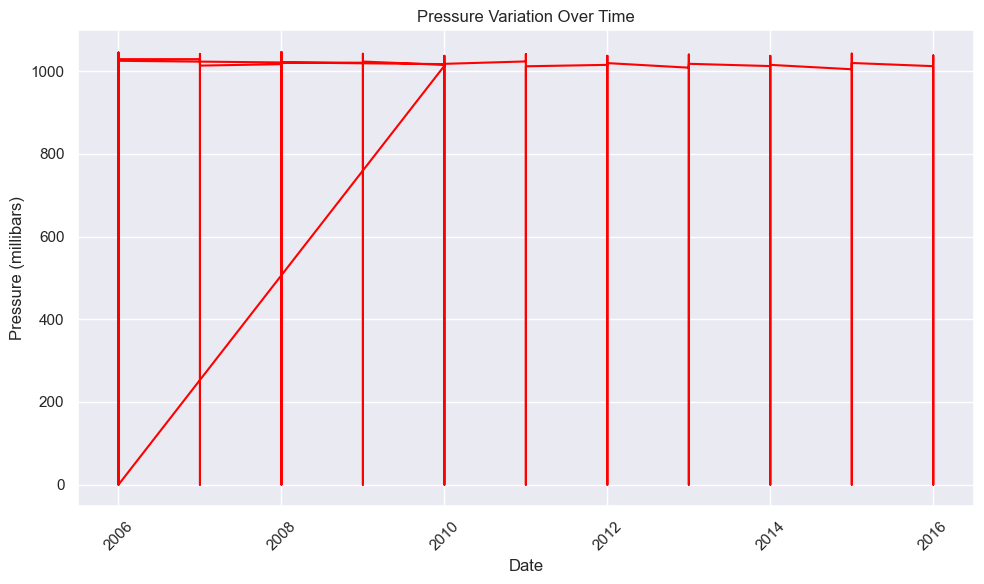

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Pressure (millibars)'], color='red')
plt.title('Pressure Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

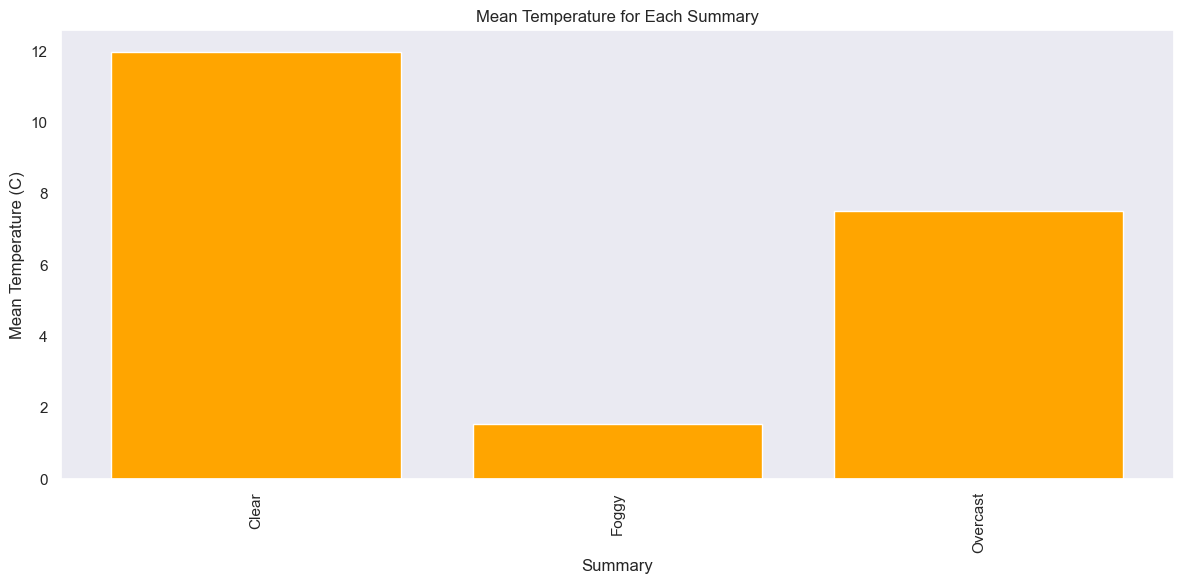

In [19]:
summary_temp = data.groupby('Summary')['Temperature (C)'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(summary_temp['Summary'], summary_temp['Temperature (C)'], color='orange')
plt.title('Mean Temperature for Each Summary')
plt.xlabel('Summary')
plt.ylabel('Mean Temperature (C)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

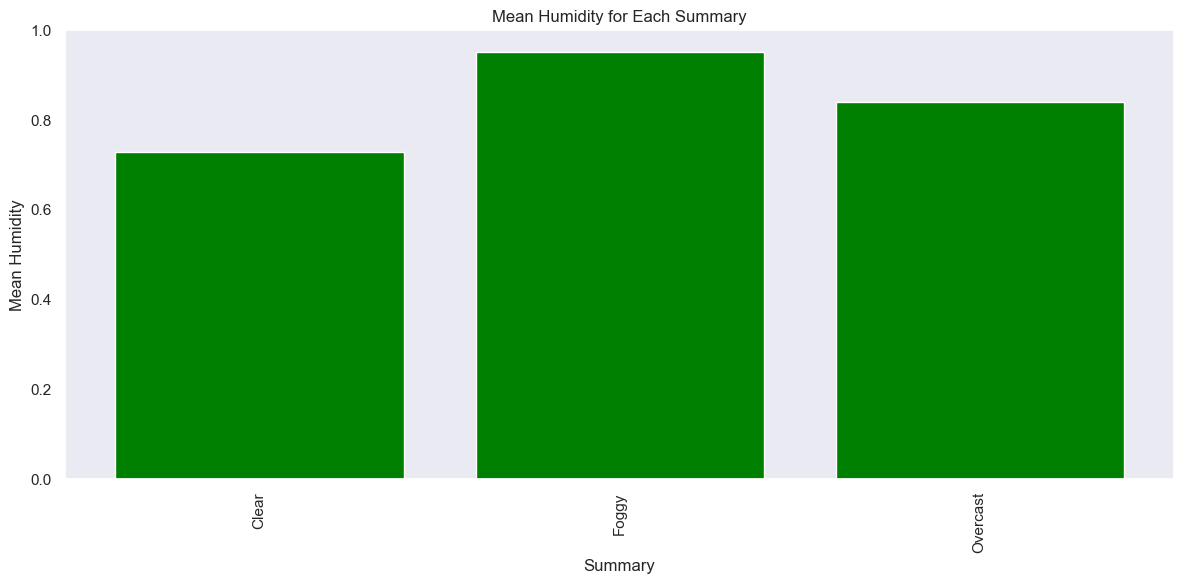

In [20]:
summary_hum = data.groupby('Summary')['Humidity'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(summary_hum['Summary'], summary_hum['Humidity'], color='green')
plt.title('Mean Humidity for Each Summary')
plt.xlabel('Summary')
plt.ylabel('Mean Humidity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

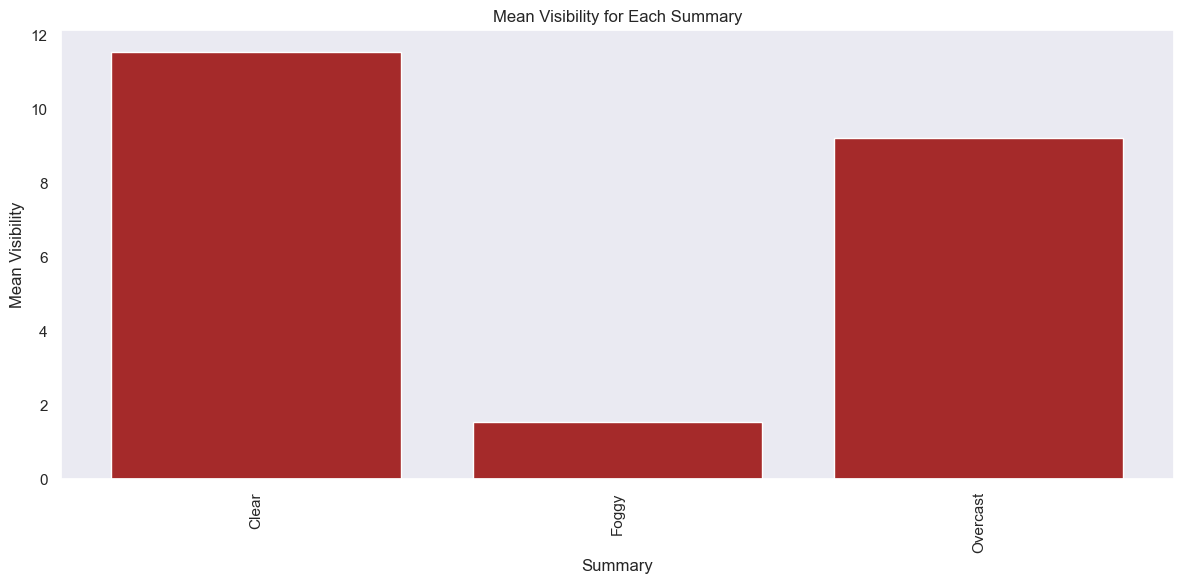

In [21]:
summary_vs = data.groupby('Summary')['Visibility (km)'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(summary_vs['Summary'], summary_vs['Visibility (km)'], color='brown')
plt.title('Mean Visibility for Each Summary')
plt.xlabel('Summary')
plt.ylabel('Mean Visibility')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

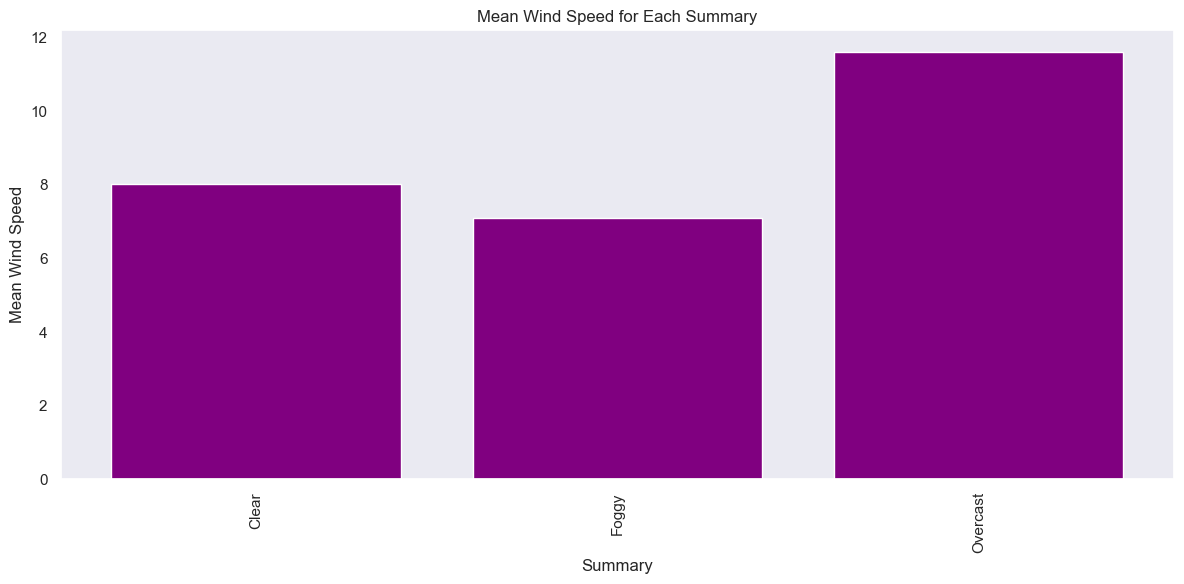

In [22]:
summary_ws = data.groupby('Summary')['Wind Speed (km/h)'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(summary_ws['Summary'], summary_ws['Wind Speed (km/h)'], color='purple')
plt.title('Mean Wind Speed for Each Summary')
plt.xlabel('Summary')
plt.ylabel('Mean Wind Speed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Model Training and Testing**

In [23]:
input_df = data.drop(columns="Summary", axis=1)
input_df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time,Year,Month,Day
44,rain,14.422222,14.422222,0.58,20.0123,159.0,15.8263,1007.85,Mostly cloudy throughout the day.,22,2006,4,10
45,rain,14.255556,14.255556,0.59,16.5025,168.0,14.9569,1007.89,Mostly cloudy throughout the day.,23,2006,4,10
46,rain,13.772222,13.772222,0.60,17.0982,160.0,15.8263,1007.36,Foggy in the evening.,0,2006,4,11
47,rain,13.283333,13.283333,0.63,14.3612,160.0,15.8263,1007.26,Foggy in the evening.,1,2006,4,11
48,rain,8.633333,5.466667,0.87,22.0409,32.0,6.6976,1005.10,Foggy in the evening.,2,2006,4,11


In [24]:
encoder = LabelEncoder()
y = data["Summary"]
y = encoder.fit_transform(y)
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'Clear' is labeled as 0
Class 'Foggy' is labeled as 1
Class 'Overcast' is labeled as 2


In [25]:
mapping = {'rain': 0, 'snow': 1}
input_df['Precip Type'] = input_df['Precip Type'].map(mapping)

In [26]:
input_df['Daily Summary Frequency'] = input_df['Daily Summary'].map(input_df['Daily Summary'].value_counts(normalize=True))
input_df.drop(columns=['Daily Summary'], axis=1, inplace=True)

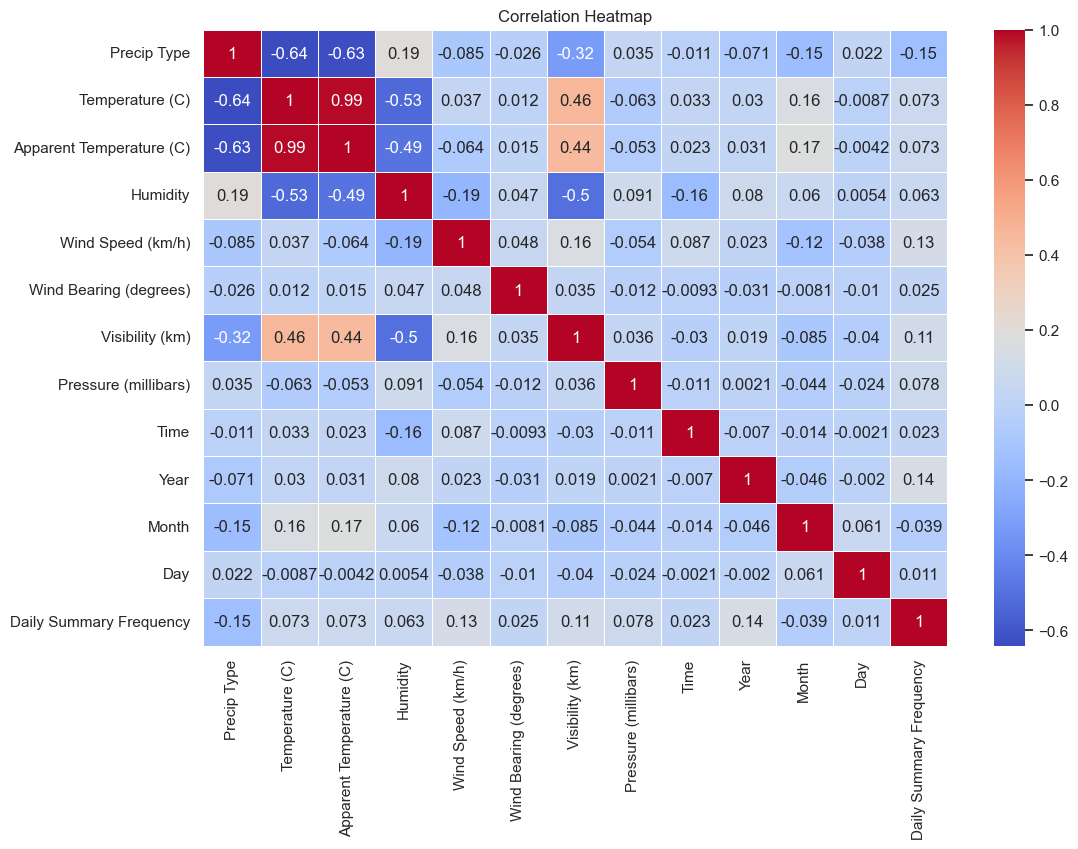

In [27]:
sns.set(style="white")
plt.figure(figsize=(12,8))
sns.heatmap(input_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
input_df.drop(['Daily Summary Frequency'], axis=1, inplace=True)
input_df.drop(['Temperature (C)'], axis=1, inplace=True)

In [29]:
X = input_df.values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
def calculate_classification_metrics(y_true, y_pred, algorithm):
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 3)
    print("Algorithm: ", algorithm)
    print()
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Overcast', 'Clear','Foggy']
    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

Best Hyperparameters: {'C': 10.0, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

Testing Performance
Algorithm:  Logistic Regression

Accuracy: 0.796
Precision: 0.794
Recall: 0.796
F1 Score: 0.794



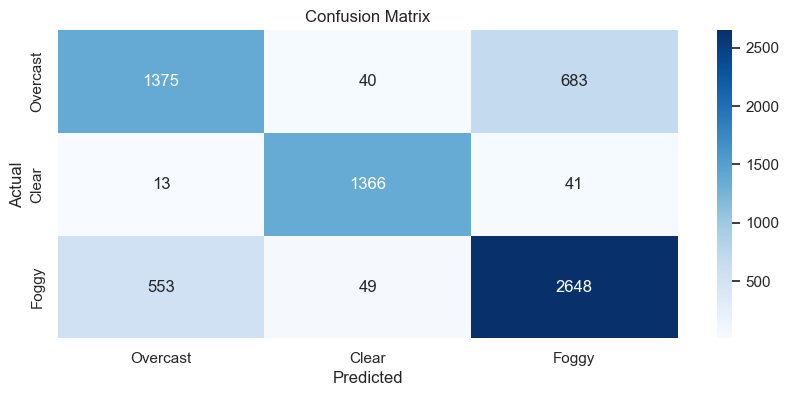

In [32]:
# Hyperparameter tuning
parameters = {'solver': ['liblinear', 'saga'],
              'multi_class':['ovr', 'multinomial'],
              'C':[0.001, 0.01, 10.0],
              'penalty': ['l1', 'l2']}
# Model Creation and Training
model_lr = LogisticRegression(n_jobs=-1)
models_lr = GridSearchCV(estimator=model_lr, param_grid=parameters, cv=4)
models_lr.fit(x_train, y_train)
best_parameters = models_lr.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions for train
best_model_lr = models_lr.best_estimator_
y_pred_lr = best_model_lr.predict(x_train)
# Predictions for test
y_pred_lr_new = best_model_lr.predict(x_test)
print("Testing Performance")
accuracy_lr, precision_lr, recall_lr, f1_lr = calculate_classification_metrics(y_test, y_pred_lr_new, "Logistic Regression")

Best Hyperparameters: {'algorithm': 'auto', 'p': 1, 'weights': 'distance'}

Testing Performance
Algorithm:  KNN

Accuracy: 0.837
Precision: 0.837
Recall: 0.837
F1 Score: 0.837



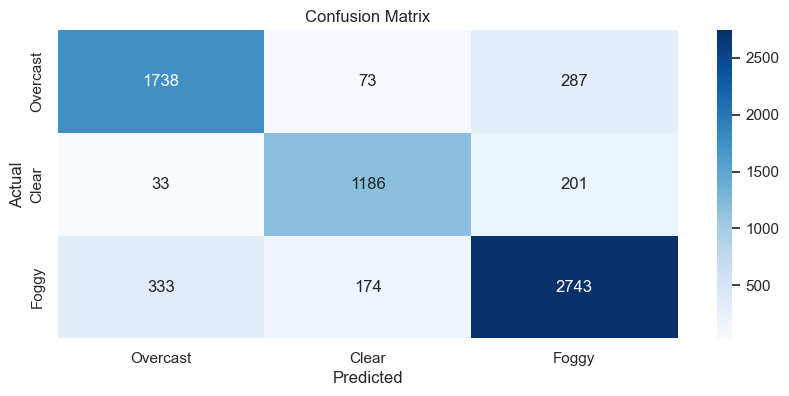

In [33]:
parameters = {'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree','kd_tree','brute'],
            'p': [1,2]}
model_knn = KNeighborsClassifier(n_neighbors=5)
models_knn = GridSearchCV(estimator=model_knn, param_grid=parameters, cv=4)
models_knn.fit(x_train, y_train)
best_parameters = models_knn.best_params_
print("Best Hyperparameters:", best_parameters)
print()
best_model_knn = models_knn.best_estimator_
y_pred_knn = best_model_knn.predict(x_train)
y_pred_knn_new = best_model_knn.predict(x_test)
print("Testing Performance")
accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_classification_metrics(y_test, y_pred_knn_new, "KNN")

Best Hyperparameters: {'criterion': 'log_loss', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}

Testing Performance
Algorithm:  Decision Tree

Accuracy: 0.896
Precision: 0.895
Recall: 0.896
F1 Score: 0.895



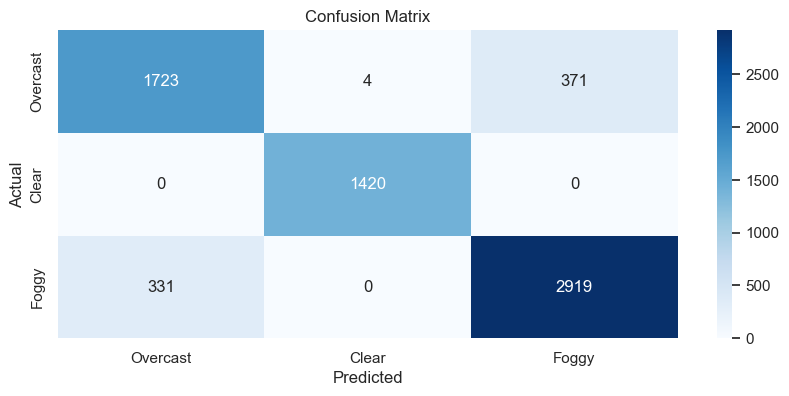

In [34]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [None, 2, 5],
              'splitter':['best','random']}
# Model Creation and Training
model_dt = DecisionTreeClassifier()
models_dt = GridSearchCV(estimator=model_dt, param_grid=parameters, cv=4)
models_dt.fit(x_train, y_train)
best_parameters = models_dt.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_dt = models_dt.best_estimator_
y_pred_dt = best_model_dt.predict(x_train)
# Predictions on test data
y_pred_dt_new = best_model_dt.predict(x_test)
print("Testing Performance")
accuracy_dt, precision_dt, recall_dt, f1_dt = calculate_classification_metrics(y_test, y_pred_dt_new, "Decision Tree")

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2}

Testing Performance
Algorithm:  Random Forest

Accuracy: 0.943
Precision: 0.943
Recall: 0.943
F1 Score: 0.943



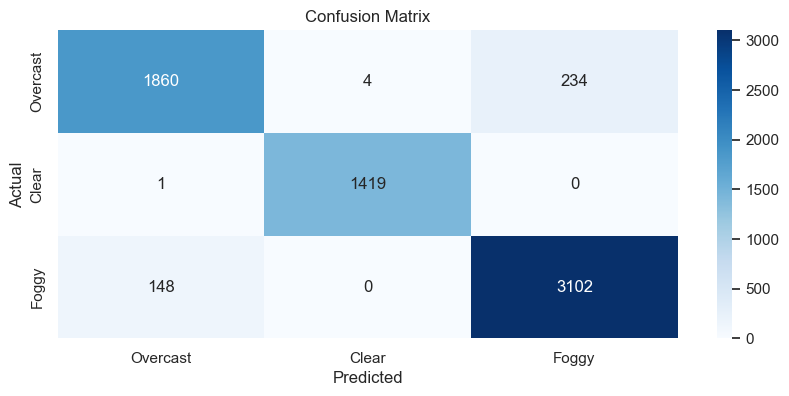

In [35]:
parameters = {'max_depth': [None, 5],
            'class_weight': [None, 'balanced'],
            'min_samples_split': [None, 2, 5]}
model_rf = RandomForestClassifier()
models_rf = GridSearchCV(estimator=model_rf, param_grid=parameters, cv=4)
models_rf.fit(x_train, y_train)
best_parameters = models_rf.best_params_
print("Best Hyperparameters:", best_parameters)
print()
best_model_rf = models_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_train)
y_pred_rf_new = best_model_rf.predict(x_test)
print("Testing Performance")
accuracy_rf, precision_rf, recall_rf, f1_rf = calculate_classification_metrics(y_test, y_pred_rf_new, "Random Forest")

In [36]:
model_comp = {
    'Model': ['Logistic Regression', "KNN","Decision Tree","Random Forest"],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_dt,accuracy_rf],
    'Precision': [precision_lr,precision_knn, precision_dt, precision_rf],
    'Recall': [recall_lr,recall_knn, recall_dt, recall_rf],
    'F1': [f1_lr,f1_knn, f1_dt, f1_rf]
}
df = pd.DataFrame(model_comp)
df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.796,0.794,0.796,0.794
1,KNN,0.837,0.837,0.837,0.837
2,Decision Tree,0.896,0.895,0.896,0.895
3,Random Forest,0.943,0.943,0.943,0.943


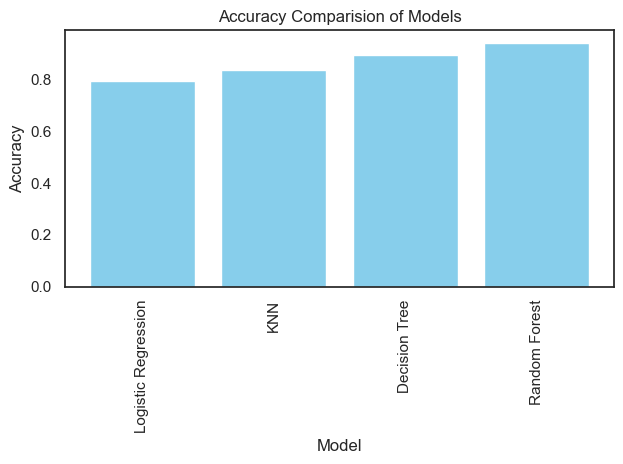

In [37]:
plt.bar(df['Model'], df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparision of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

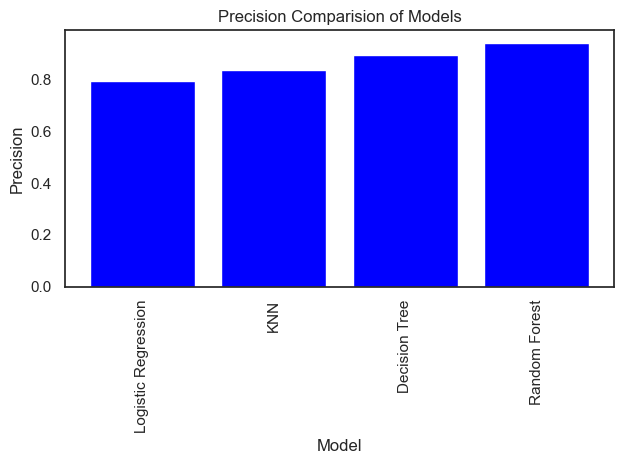

In [38]:
plt.bar(df['Model'], df['Precision'], color='blue')
plt.title('Precision Comparision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

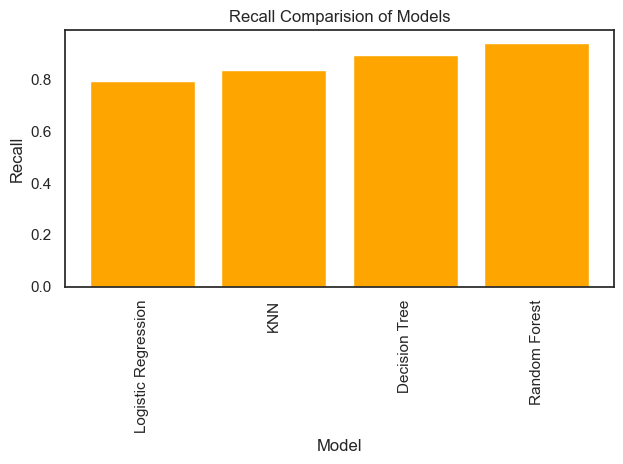

In [39]:
plt.bar(df['Model'], df['Recall'], color='orange')
plt.title('Recall Comparision of Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

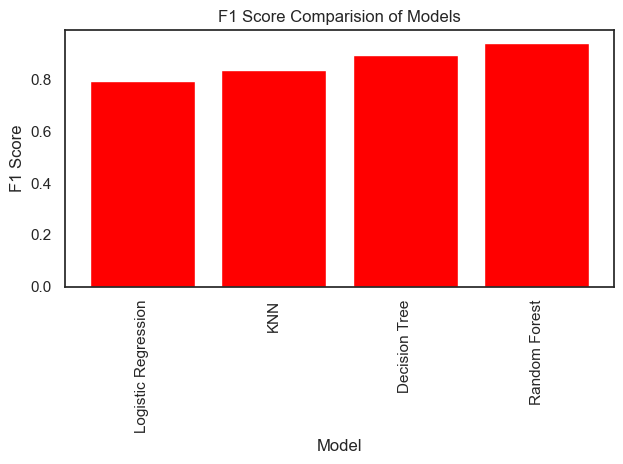

In [40]:
plt.bar(df['Model'], df['F1'], color='red')
plt.title('F1 Score Comparision of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()